# Assignment 4: Conjoint Analysis
The objective of this assignment is to give you experience with ratings-based conjoint analysis.

### Part 1: Study Design

In [625]:
# Import the experimental design builder script.
import sys
sys.path.insert(1, '/data/Assignment-4')
import designer

**Task 1:** Define a variable called `attributes` that contains the attributes and levels within each attribute.  The viable shoukd be a dictionary where each attribute is a key and the value associated witht he key is a list of the levels.  For example, if the two attributes were color (with levels red and green) and shape (with levels round and square), then `attributes` would be defined as follows.

```
attributes = {"color": ["red", "green"],
             "shape": ["round", "square"]}
```

In [626]:
attributes = {"Flavor": ["Green Tea", "Black Tea"],
             "Sweetness": ["Sweetened", "Unsweetened"],
              "Caffeine": ["Caffeinated", "Decaffeinated"],
             "Container": ["Glass Bottle", "Can"]}

In [627]:
# Use the designer script to find a matching design.
design = designer.get_design(attributes)
design

,Flavor,Sweetness,Caffeine,Container
0,Green Tea,Sweetened,Decaffeinated,Can
1,Black Tea,Unsweetened,Decaffeinated,Can
2,Black Tea,Sweetened,Caffeinated,Can
3,Black Tea,Sweetened,Decaffeinated,Glass Bottle
4,Green Tea,Unsweetened,Caffeinated,Can
5,Green Tea,Unsweetened,Decaffeinated,Glass Bottle
6,Black Tea,Unsweetened,Caffeinated,Glass Bottle
7,Green Tea,Sweetened,Caffeinated,Glass Bottle


**Task 2:** Import survey data

In [628]:
import pandas as pd
import numpy as np
raw_survey_results = pd.read_csv("survey.csv", header=1)
raw_survey_results.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,User Language,"Please rate the following combination, based on your preference, on a scale of 1-7 \n(with 1 being the least preferred and 7 being the most preferred) - Black Tea, Sweetened, Caffeinated, Can","Please rate the following combination, based on your preference, on a scale of 1-7 \n(with 1 being the least preferred and 7 being the most preferred) - Black Tea, Sweetened, Decaffeinated, Glass Bottle","Please rate the following combination, based on your preference, on a scale of 1-7 \n(with 1 being the least preferred and 7 being the most preferred) - Black Tea, Unsweetened, Caffeinated, Glass Bottle","Please rate the following combination, based on your preference, on a scale of 1-7 \n(with 1 being the least preferred and 7 being the most preferred) - Black Tea, Unsweetened, Decaffeinated, Can","Please rate the following combination, based on your preference, on a scale of 1-7 \n(with 1 being the least preferred and 7 being the most preferred) - Green Tea, Sweetened, Decaffeinated, Can","Please rate the following combination, based on your preference, on a scale of 1-7 \n(with 1 being the least preferred and 7 being the most preferred) - Green Tea, Unsweetened, Caffeinated, Can","Please rate the following combination, based on your preference, on a scale of 1-7 \n(with 1 being the least preferred and 7 being the most preferred) - Green Tea, Unsweetened, Decaffeinated, Glass Bottle","Please rate the following combination, based on your preference, on a scale of 1-7 \n(with 1 being the least preferred and 7 being the most preferred) - Green Tea, Sweetened, Caffeinated, Glass Bottle","Thank you for your participation! If there is any other feedback you would like to provide regarding the contents of this survey, please feel free to do so here: (Maximum Characters: 300)"
0,"{""ImportId"":""startDate"",""timeZone"":""America/Ne...","{""ImportId"":""endDate"",""timeZone"":""America/New_...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""userLanguage""}","{""ImportId"":""QID1_1""}","{""ImportId"":""QID1_2""}","{""ImportId"":""QID1_3""}","{""ImportId"":""QID1_4""}","{""ImportId"":""QID1_5""}","{""ImportId"":""QID1_6""}","{""ImportId"":""QID1_7""}","{""ImportId"":""QID1_8""}","{""ImportId"":""QID3_TEXT""}"
1,2019-11-14 15:26:00,2019-11-14 15:27:55,0,174.205.7.92,100,114,1,2019-11-14 15:27:55,R_1Q4nqSrubHqKuMv,NaN,...,EN,7,2,5,2,2,5,2,7,NaN
2,2019-11-14 15:27:06,2019-11-14 15:28:25,0,172.58.21.159,100,79,1,2019-11-14 15:28:26,R_5BZWtWPovROXUtj,NaN,...,EN,4,6,4,1,5,5,7,6,NaN
3,2019-11-14 15:32:40,2019-11-14 15:33:43,0,152.3.34.30,100,62,1,2019-11-14 15:33:43,R_9QVbkjszk402UY9,NaN,...,EN,4,4,3,4,3,3,4,3,Keep up the good work!
4,2019-11-14 15:32:07,2019-11-14 15:34:11,0,129.234.0.169,100,123,1,2019-11-14 15:34:11,R_30vDF1PIimnLKCz,NaN,...,EN,3,3,1,1,7,6,4,6,NaN


**Task 3:** Clean the data in preparation for analysis; name the clean data frame `clean_survey_results`.  You may need to do some or all of the following:
- remove rows and/or columns
- rename columns
- melt the data
- merge the data with the design data frame you created previously
The final data frame should have one row per rating with the following columns:
- some kind of respondent identifier to distinguish individuals
- the rating (1-7)
- one column for each attribute

In [629]:
clean_survey_results = raw_survey_results.drop(raw_survey_results.index[0]) #remove first row
clean_survey_results = clean_survey_results.iloc[:, [8, 17, 18, 19, 20, 21, 22, 23, 24]] #select rows we need
clean_survey_results.columns = ['Response ID'] +([str(i) for i in range(1,9)]) #rename the columns' names
clean_survey_results = clean_survey_results.replace(np.nan, '1', regex=True) #replace NULL values with 1
clean_survey_results['Response ID'] = range(1, len(clean_survey_results)+1) #rename the Response ID
clean_survey_results = pd.melt(clean_survey_results, id_vars = ['Response ID'], var_name='product', value_name='rating') #melt the data frame
clean_survey_results

,Response ID,product,rating
0,1,1,7
1,2,1,4
2,3,1,4
3,4,1,3
4,5,1,2
...,...,...,...
211,23,8,7
212,24,8,4
213,25,8,4
214,26,8,2


In [630]:
design = pd.DataFrame({"product": [str(i) for i in range(1,9)],
                       "Flavor": ["Black Tea"]*4 + ["Green Tea"]*4,
                       "Sweetness": (["Sweetened"]*2 + ["Unsweetened"]*2) + ["Sweetened"] + ["Unsweetened"]*2 + ["Sweetened"],
                       "Caffeine": (["Caffeinated"] + ["Decaffeinated"])*2 + (["Decaffeinated"] + ["Caffeinated"])*2,
                       "Container": ["Can"] + ["Glass Bottle"]*2 + ["Can"]*3 + ["Glass Bottle"]*2}) #create a design dataframe according to our survey
design

,product,Flavor,Sweetness,Caffeine,Container
0,1,Black Tea,Sweetened,Caffeinated,Can
1,2,Black Tea,Sweetened,Decaffeinated,Glass Bottle
2,3,Black Tea,Unsweetened,Caffeinated,Glass Bottle
3,4,Black Tea,Unsweetened,Decaffeinated,Can
4,5,Green Tea,Sweetened,Decaffeinated,Can
5,6,Green Tea,Unsweetened,Caffeinated,Can
6,7,Green Tea,Unsweetened,Decaffeinated,Glass Bottle
7,8,Green Tea,Sweetened,Caffeinated,Glass Bottle


In [631]:
clean_survey_results = clean_survey_results.merge(design, on='product') #merge two dataframes
clean_survey_results = clean_survey_results.drop('product', axis=1) #remove the product columns
clean_survey_results #obtain the final clean survey results dataframe

,Response ID,rating,Flavor,Sweetness,Caffeine,Container
0,1,7,Black Tea,Sweetened,Caffeinated,Can
1,2,4,Black Tea,Sweetened,Caffeinated,Can
2,3,4,Black Tea,Sweetened,Caffeinated,Can
3,4,3,Black Tea,Sweetened,Caffeinated,Can
4,5,2,Black Tea,Sweetened,Caffeinated,Can
...,...,...,...,...,...,...
211,23,7,Green Tea,Sweetened,Caffeinated,Glass Bottle
212,24,4,Green Tea,Sweetened,Caffeinated,Glass Bottle
213,25,4,Green Tea,Sweetened,Caffeinated,Glass Bottle
214,26,2,Green Tea,Sweetened,Caffeinated,Glass Bottle


**Task 4:** Introduce dummy variables in preparation for anlaysis.  Now, for each attribute, there should be the number of levels minus one.  (The intercept captures the "default" level, and the part-worths for all other levels will be measured relative to the default utility.)

In [632]:
data = clean_survey_results
data['Flavor_alt'] = data['Flavor'] == "Black Tea" #set Green Tea as default
data['Sweetness_alt'] = data['Sweetness'] == "Sweetened" #set Unsweetened as default
data['Caffeine_alt'] = data['Caffeine'] == "Decaffeinated" #set Caffeinated as default
data['Container_alt'] = data['Container'] == "Can" #set Glass Bottle as default
data = data.drop(['Flavor', 'Container', 'Caffeine', 'Sweetness'], axis=1) #remove unneeded columns
data

,Response ID,rating,Flavor_alt,Sweetness_alt,Caffeine_alt,Container_alt
0,1,7,True,True,False,True
1,2,4,True,True,False,True
2,3,4,True,True,False,True
3,4,3,True,True,False,True
4,5,2,True,True,False,True
...,...,...,...,...,...,...
211,23,7,False,True,False,False
212,24,4,False,True,False,False
213,25,4,False,True,False,False
214,26,2,False,True,False,False


### Part 4: Estimate the average and individual part-worths

Use [sklearn's implementation of linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to estimate part-worths.

In [633]:
import numpy as np
from sklearn.linear_model import LinearRegression

**Task 5:** Compute the average part-worths by:
- splitting the data into `y` (the response/rating) and `X` (the explanatory variables/attribute levels), and
- Run a linear regression to estimate intercept and coefficients.

In [634]:
y = np.array(data.to_numpy()[:,1]) #set rating as our dependent variable 
X = np.array(data.to_numpy()[:,2:], dtype=int) #set the 4 attributes as our independent variables
reg = LinearRegression().fit(X, y) #run a linear regression
reg.coef_ #check the coefficients of the regression

array([-0.5       ,  0.46296296, -0.14814815, -0.62962963])

In [635]:
reg.intercept_ #check the intercept of the regression

4.064814814814815

**Task 6:** Calculate the importance of each attribute by doing the following steps.
1. Compute the part-worth range for each attribute. 
2. Calculate the total range, summing the ranges over each attribute.
3. Calculate the importance for a single attribute as the range for that attribute over the total range.

In [636]:
ranges = abs(reg.coef_) #Calculate the total range, summing the ranges over each attribute
importance = ranges / sum(ranges) #Calculate the importance for a single attribute
importance

array([0.28723404, 0.26595745, 0.08510638, 0.36170213])

In [637]:
0.28723404 + 0.36170213 + 0.08510638 + 0.26595745 == 1 #check if the sum of the importance for a single attribute equals to 1

True

**Task 7:** Calculate individual part-worths. Divide up the data by individual respondent and running one regression for each respondent.

Create a data frame called `individual_part_worths` that has one row per individual respondent; the columns should be the respondent identifier, the intercept of the regression, and all the coefficients of the regression.

In [638]:
allRows_coef = []
allRows_intercept = []
for i, g in data.groupby('Response ID'):
    y = np.array(g.to_numpy()[:,1]) #set rating as our dependent variable 
    X = np.array(g.to_numpy()[:,2:], dtype=int) #set the 4 attributes as our independent variables
    globals()['data_Response' + str(i)] = g #create a dataframe for each individual
    globals()['reg' + str(i)] = LinearRegression().fit(X, y) #run a linear regression for each individual
    globals()['reg_coef' + str(i)] = LinearRegression().fit(X, y).coef_ #obtain the coefficients of the regression for each individual
    globals()['reg_intercept' + str(i)] = LinearRegression().fit(X, y).intercept_ #obtain the intercept of the regression for each individual
    rows_coef = LinearRegression().fit(X, y).coef_ #store the coefficients in to a variable called rows_coef
    allRows_coef = np.concatenate([allRows_coef, rows_coef]) #stack all the rows together and get a full result
    rows_intercept = LinearRegression().fit(X, y).intercept_ #store the intercept in to a variable called rows_intercept
    rows_intercept = np.array([rows_intercept]) #make it an array
    allRows_intercept = np.concatenate([allRows_intercept, rows_intercept]) #stack all the rows together and get a full result

In [639]:
allRows_coef = np.reshape(allRows_coef, (-1, 4)) #reshape the array
allRows_intercept = np.reshape(allRows_intercept, (-1, 1)) #reshape the array
data_coef = pd.DataFrame({'Flavor_coef': allRows_coef[:, 0], 
                          'Sweetness_coef': allRows_coef[:, 1], 
                          'Caffeine_coef': allRows_coef[:, 2], 
                          'Container_coef': allRows_coef[:, 3]}) #create a dataframe called data_coef
data_intercept = pd.DataFrame({'Intercept': allRows_intercept[:, 0]}) #create a dataframe called data_intercept
response_id = pd.DataFrame({"Response ID": [str(i) for i in range(1,28)]}) #create a dataframe called response_id
individual_part_worths = pd.concat([response_id, data_intercept, data_coef],axis=1) #combine these 3 dataframes into a new dataframe called individual_part_worths
individual_part_worths

,Response ID,Intercept,Flavor_coef,Sweetness_coef,Caffeine_coef,Container_coef
0,1,5.500,6.280370e-16,1.000000e+00,-4.000000e+00,-1.216822e-15
1,2,6.250,-2.000000e+00,1.000000e+00,0.000000e+00,-2.000000e+00
2,3,3.000,5.000000e-01,-1.110223e-16,5.000000e-01,3.925231e-16
3,4,4.625,-3.750000e+00,1.750000e+00,-2.500000e-01,7.500000e-01
4,5,2.875,-2.500000e-01,7.500000e-01,2.500000e-01,-1.250000e+00
5,6,4.750,1.962616e-17,-1.000000e+00,-1.500000e+00,-5.000000e-01
6,7,0.500,0.000000e+00,5.000000e+00,8.881784e-16,1.000000e+00
7,8,2.000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
8,9,4.750,-2.000000e+00,2.500000e+00,-5.000000e-01,-1.000000e+00
9,10,4.000,0.000000e+00,3.000000e+00,-1.500000e+00,-1.500000e+00


**Task 8:** Create a visualization of the individual respondent coefficients and intercepts.  On the x axis should have categories for each of the level dummy variables and default; on the y-axis should be the part-worths (the values of the coefficients and the intercepts).  You should ploth both a summary of the part-worths (e.g., a violin plot, or box and whiskers) and the individual values.

In [640]:
# Set up R, if desired for visualization
import rpy2.ipython
%reload_ext rpy2.ipython

In [641]:
#create a dataframe for each level
data_intercept['Level'] = 'Intercept'
flavor_coef = data_coef[['Flavor_coef']]
flavor_coef['Level'] = 'Black Tea'
sweetness_coef = data_coef[['Sweetness_coef']]
sweetness_coef['Level'] = 'Sweetened'
caffeine_coef = data_coef[['Caffeine_coef']]
caffeine_coef['Level'] = 'Decaffeinated'
container_coef = data_coef[['Container_coef']]
container_coef['Level'] = 'Can'
#create a dataframe for our default levels
default_coef = pd.DataFrame({"Part_worths": 0,
                                   "Level": ["Green Tea"]*len(data_intercept) + 
                                            ["Unsweetened"]*len(data_intercept) + 
                                            ["Caffeinated"]*len(data_intercept) + 
                                            ["Glass Bottle"]*len(data_intercept)})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [642]:
data_intercept.columns = ['Part_worths'] + ['Level'] #rename the columns' names
flavor_coef.columns = ['Part_worths'] + ['Level']
sweetness_coef.columns = ['Part_worths'] + ['Level']
caffeine_coef.columns = ['Part_worths'] + ['Level']
container_coef.columns = ['Part_worths'] + ['Level']

In [643]:
pdList = [data_intercept, flavor_coef, sweetness_coef, caffeine_coef, container_coef, default_coef]  # List of our dataframes
new_part_worths = pd.concat(pdList, ignore_index=True) #create a dataframe called new_part_worths for data visualization 
new_part_worths

,Part_worths,Level
0,5.500,Intercept
1,6.250,Intercept
2,3.000,Intercept
3,4.625,Intercept
4,2.875,Intercept
...,...,...
238,0.000,Glass Bottle
239,0.000,Glass Bottle
240,0.000,Glass Bottle
241,0.000,Glass Bottle


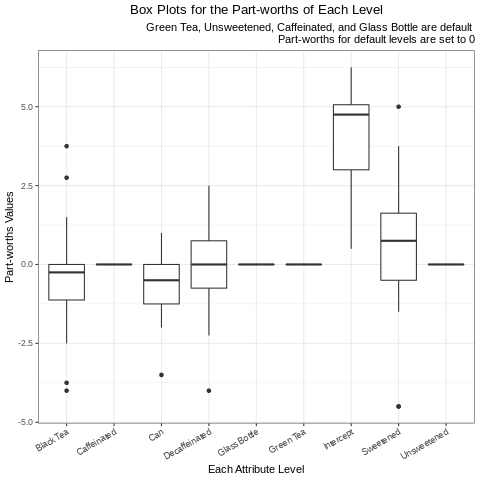

In [644]:
%%R -i new_part_worths
library(ggplot2)
ggplot(new_part_worths, aes(x = Level, y = Part_worths)) +
  geom_boxplot(show.legend = T) + theme_bw() +
    labs(title = 'Box Plots for the Part-worths of Each Level', 
        subtitle = 'Green Tea, Unsweetened, Caffeinated, and Glass Bottle are default \n Part-worths for default levels are set to 0',
        x = 'Each Attribute Level', y = 'Part-worths Values') +
        theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 1))+ 
        theme(axis.text.x = element_text(angle=30, hjust=1, vjust=1))

In [517]:
%%R
ggsave("Box_Plots.pdf", width=10, height=8) #save the plot

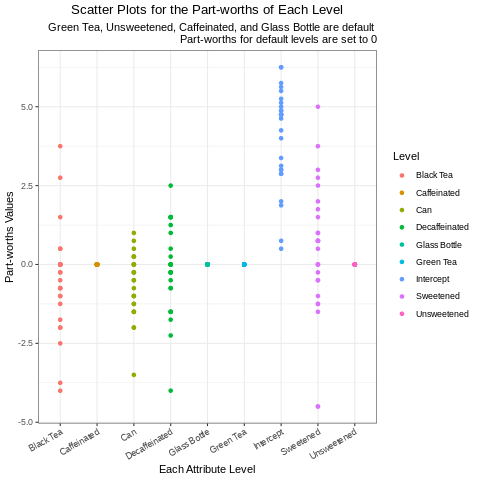

In [645]:
%%R -i new_part_worths
library(ggplot2)
ggplot(new_part_worths, aes(x = Level, y = Part_worths, color = Level)) +
  geom_point(show.legend = T) + theme_bw()+
    labs(title = 'Scatter Plots for the Part-worths of Each Level', 
        subtitle = 'Green Tea, Unsweetened, Caffeinated, and Glass Bottle are default \n Part-worths for default levels are set to 0',
        x = 'Each Attribute Level', y = 'Part-worths Values') +
        theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 1))+ 
        theme(axis.text.x = element_text(angle=30, hjust=1, vjust=1))

In [531]:
%%R
ggsave("Scatter_Plots.pdf", width=10, height=8) #save the plot

### Part 5: Simulate the Market
**Task 9:** Write a function `utility` that takes two arguments:
- `product`: a list of which level has been selected for each attribute.  For example, if the two attributes were color (with levels red and green) and shape (with levels round and square), then `product` could take the value `["red", "square"]`.
- `part_worths`: a row from the `individual_part_worths` data frame created for Task 6 (i.e., one individual's part-worths) .

The `utility` function should compute and return the utility of the specified individual for the specified product; this is the intercept plus any relevant part-worths that correspond to the product's attribute levels.

In [646]:
def utility(product,part_worths):
    utility = part_worths[0][1]
    if product[0] == 'Black Tea':
        utility += part_worths[0][2]
    if product[1] == 'Sweetened':
        utility += part_worths[0][3]
    if product[2] == 'Decaffeinated':
        utility += part_worths[0][4]
    if product[3] == 'Can':
        utility += part_worths[0][5]
    return utility

In [647]:
#test the utility funciton
product = ['Black Tea', 'Sweetened', 'Decaffeinated', 'Can'] #define the product that we want to test
part_worths = individual_part_worths.loc[individual_part_worths['Response ID'] == '27'].to_numpy() #define the individua that we want to test
utility(product,part_worths)

4.000000000000001

In [648]:
3.000+0.5+1.5+0.000000 - 1.000000 #double check

4.0

**Task 10:** Write a function `choose_product` that takes two arguments:
- `products`: a list of products, where each product is its own list as specified in Task 9, (Yes, it's a list of lists!)
- `part_worths`: a row of inidivudual part worths, just as used in Task 9.

This fuction should return a numpy array with the same length as the number of products; this array should contain a boolean value (true or false) for each product.  The value for a product should be true if it maximizes the utility for the individual; as multiple products can have equivalent utilities, more than one product might maximize utility.

As an example, if there are two products, the `choose_product` function could return `[True, False]` if the first product maximizes the utility, `[False, True]` if the second product maximizes utility, or `[True, True]` if both products have the same utility and therefor both maximize utility for specified the individual.

In [649]:
def choose_product(products,part_worths):
    max_u = -10
    u_list = []
    result = []
    for x in products:
        u = utility(x,part_worths)
        u_list.append(u)
        if u > max_u:
            max_u = u
    for y in u_list:
        if y == max_u:
            result.append(True)
        if y < max_u:
            result.append(False)
    return result

In [650]:
#test the choose_product funciton
products = design[['Flavor', 'Sweetness', 'Caffeine', 'Container']].values.tolist() #define the product lists
part_worths = individual_part_worths.loc[individual_part_worths['Response ID'] == '1'].to_numpy() #define the individua that we want to test
choose_product_list = choose_product(products,part_worths)
# using enumerate() + list comprehension to return true indices
res = [i for i, val in enumerate(choose_product_list) if val] 
# printing result 
print ("The list indices having True values is : " + str(res))
if len(res) == 1:
    print ("The product with maximum utility is: " + str(products[int(res[0])]))
elif len(res) == 2:
    print ("The product with maximum utility are: " + str(products[int(res[0])]) + ' and ' + str(products[int(res[1])]))
else: 
    print("There is no product with maximum utility.")

The list indices having True values is : [0, 7]
The product with maximum utility are: ['Black Tea', 'Sweetened', 'Caffeinated', 'Can'] and ['Green Tea', 'Sweetened', 'Caffeinated', 'Glass Bottle']


**Task 11:** Write a function `simulate` that takes two arguments:
- `products`: a list of products, identitcal to the argument for Task 10.
- The `individual_part_worths` data frame created for Task 7.

This function simulate the market share of the products by having each individual choose a product from the list.  For an individual who chooses more than one item (multiple items are tied for the top utility value), their "vote" is split between the tied items.  The function should return an array of proportions of market share.  

In [651]:
def simulate(products,individual_part_worths):
    selected_product = []
    market_share = []
    for i in range(len(individual_part_worths)):
        selected_product.append(choose_product(products,individual_part_worths.iloc[[i]].to_numpy()))
    selected_product = np.array(selected_product)
    for i,x in enumerate(selected_product.sum(axis = 1)):
        market_share.append(selected_product[i]*1.0/x)
    market_share = np.array(market_share).sum(axis = 0)/len(individual_part_worths)
    return market_share

In [652]:
#test the simulate funciton
simulate(products,individual_part_worths)

array([0.09259259, 0.10185185, 0.08333333, 0.05555556, 0.11111111,
       0.07407407, 0.21296296, 0.26851852])

In [653]:
0.09259259+ 0.10185185+ 0.08333333+ 0.05555556+ 0.11111111+ 0.07407407+ 0.21296296+ 0.26851852 #double check

0.9999999900000001

**Task 12:** Create a variable called `my_product` that has the ideal value (maximum average utility) based on what you discovered in Task 5; this should be in the format described in Task 9.  For example, if the two attributes were color (with levels red and green) and shape (with levels round and square), then `my_product` could take the value `["red", "square"]`.  Also create three competitiors (e.g., `competitor1`) using this same format.  Create a list called `all_products` that contains all four products and simulate the market with the products.

In [654]:
#recall our regression coefficients
reg.coef_ 
#it's clear that except for Sweetness, we should choose the default levels for all the other attributes.

array([-0.5       ,  0.46296296, -0.14814815, -0.62962963])

In [655]:
#recall our survey design products combination
design
#it's clear that we can't choose the ideal product combination
#so, we need to choose the product combination that yield the highest utility

,product,Flavor,Sweetness,Caffeine,Container
0,1,Black Tea,Sweetened,Caffeinated,Can
1,2,Black Tea,Sweetened,Decaffeinated,Glass Bottle
2,3,Black Tea,Unsweetened,Caffeinated,Glass Bottle
3,4,Black Tea,Unsweetened,Decaffeinated,Can
4,5,Green Tea,Sweetened,Decaffeinated,Can
5,6,Green Tea,Unsweetened,Caffeinated,Can
6,7,Green Tea,Unsweetened,Decaffeinated,Glass Bottle
7,8,Green Tea,Sweetened,Caffeinated,Glass Bottle


In [656]:
#define a function to calculate the overall utility for each product combination
coef_overall = reg.coef_ 
def utility_overall(products,coef_overall):
    utility = reg.intercept_
    if products[0] == 'Black Tea':
        utility += coef_overall[0]
    if products[1] == 'Sweetened':
        utility += coef_overall[1]
    if products[2] == 'Decaffeinated':
        utility += coef_overall[2]
    if products[3] == 'Can':
        utility += coef_overall[3]
    return utility

In [657]:
#create a product_utility list
product_utility1 = utility_overall(products[0],coef_overall)
product_utility2 = utility_overall(products[1],coef_overall)
product_utility3 = utility_overall(products[2],coef_overall)
product_utility4 = utility_overall(products[3],coef_overall)
product_utility5 = utility_overall(products[4],coef_overall)
product_utility6 = utility_overall(products[5],coef_overall)
product_utility7 = utility_overall(products[6],coef_overall)
product_utility8 = utility_overall(products[7],coef_overall)
product_utility = [product_utility1, product_utility2, product_utility3, product_utility4, 
    product_utility5, product_utility6, product_utility7, product_utility8]
product_utility

[3.398148148148148,
 3.8796296296296298,
 3.564814814814815,
 2.787037037037037,
 3.75,
 3.435185185185185,
 3.916666666666667,
 4.527777777777778]

In [658]:
# function to find minimum and maximum position in list 
def maximum(a, n): 
    # inbuilt function to find the position of minimum  
    minpos = a.index(min(a)) 
    # inbuilt function to find the position of maximum  
    maxpos = a.index(max(a))  
    # printing the position  
    print("The maximum is product #", maxpos + 1)
    print("The minimum is product #", minpos + 1)  
# driver code 
a = product_utility 
maximum(a, len(a)) 

The maximum is product # 8
The minimum is product # 4


In [659]:
#recall our survey design products combination
design

,product,Flavor,Sweetness,Caffeine,Container
0,1,Black Tea,Sweetened,Caffeinated,Can
1,2,Black Tea,Sweetened,Decaffeinated,Glass Bottle
2,3,Black Tea,Unsweetened,Caffeinated,Glass Bottle
3,4,Black Tea,Unsweetened,Decaffeinated,Can
4,5,Green Tea,Sweetened,Decaffeinated,Can
5,6,Green Tea,Unsweetened,Caffeinated,Can
6,7,Green Tea,Unsweetened,Decaffeinated,Glass Bottle
7,8,Green Tea,Sweetened,Caffeinated,Glass Bottle


In [660]:
my_product = ['Green Tea', 'Sweetened', 'Caffeinated', 'Glass Bottle']
competitor1 = ['Green Tea', 'Sweetened', 'Decaffeinated', 'Can']
competitor2 = ['Black Tea', 'Unsweetened', 'Decaffeinated', 'Glass Bottle']
competitor3 = ['Black Tea', 'Unsweetened', 'Decaffeinated', 'Can']
all_products = [my_product, competitor1, competitor2, competitor3]
simulate(all_products,individual_part_worths)

array([0.51851852, 0.14814815, 0.24074074, 0.09259259])

**Task 13:** Redefine `my_product` such that the most important attribute (from Task 6) now has the least liked level (per what you found in Task 5) and rerun the market simulation keeping the competitors the same.

In [661]:
#recall the importance of each attribute
importance

array([0.28723404, 0.26595745, 0.08510638, 0.36170213])

In [662]:
#redefine my_product: change Glass Bottle to Can
my_product = ['Green Tea', 'Sweetened', 'Caffeinated', 'Can']
competitor1 = ['Green Tea', 'Sweetened', 'Decaffeinated', 'can']
competitor2 = ['Black Tea', 'Unsweetened', 'Decaffeinated', 'Glass Bottle']
competitor3 = ['Black Tea', 'Unsweetened', 'Caffeinated', 'Can']
all_products = [my_product, competitor1, competitor2, competitor3]
simulate(all_products,individual_part_worths)

array([0.11111111, 0.40740741, 0.18518519, 0.2962963 ])